In [230]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = pd.read_json('mnist_784.json')

In [47]:
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [94]:
train, test = train_test_split(mnist, test_size=0.2)

In [101]:
y_train, y_test = train.target.reset_index(drop=True), test.target.reset_index(drop=True)
X_train, X_test = train.drop('target', axis=1).reset_index(drop=True), test.drop('target', axis=1).reset_index(drop=True)

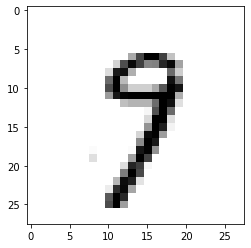

In [171]:
random_digit = X_test.iloc[2].to_numpy()
reshaped_random_digit = random_digit.reshape(28,28)
plt.imshow(reshaped_random_digit, cmap=matplotlib.cm.binary, interpolation="nearest")

In [222]:
y_train_9 = np.array((y_train == 9))
y_test_9 = np.array((y_test == 9))

In [180]:
clf = LogisticRegression(tol=0.1, max_iter=100)

In [181]:
clf.fit(X_train, y_train_9)

LogisticRegression(tol=0.1)

In [186]:
y_pred = clf.predict(X_test)

In [187]:
y_pred

array([False, False, False, ..., False, False, False])

In [193]:
a = cross_val_score(clf, X_test, y_test_9, cv=3, scoring="accuracy")

In [194]:
a.mean()

0.9508571321508388

In [195]:
clf_SVC = svm.SVC()

In [197]:
clf_SVC.fit(X_train, y_train_9)

SVC()

In [198]:
y_pred_2 = clf_SVC.predict(X_test)

In [202]:
y_pred_2

array([False, False,  True, ..., False, False, False])

In [207]:
a_SVC = cross_val_score(clf_SVC, X_test, y_test_9, cv=3, scoring="accuracy")

In [208]:
a_SVC.mean()

0.9846428671909511

In [212]:
clf_all = LogisticRegression(tol=0.1, max_iter=100)

In [213]:
clf_all.fit(X_train, y_train)

LogisticRegression(tol=0.1)

In [216]:
y_pred = clf_all.predict(X_test)

In [217]:
y_pred

array([3, 8, 7, ..., 3, 2, 6], dtype=int64)

In [228]:
a_all = cross_val_score(clf_all, X_test, y_test, cv=3, scoring="accuracy")

In [229]:
a_all.mean()

0.8774996415815379

In [231]:
clf_guass = GaussianNB()

In [232]:
clf_guass.fit(X_train, y_train)

GaussianNB()

In [233]:
y_pred = clf_guass.predict(X_test)

In [234]:
y_pred

array([1, 9, 9, ..., 3, 6, 6], dtype=int64)

In [235]:
a_gauss = cross_val_score(clf_guass, X_test, y_test, cv=3, scoring="accuracy")

In [236]:
a_gauss.mean()

0.5767863528699637